

<br>

---

# Regression problem: 

---

<br>

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf;

In [35]:

df = pd.read_csv("dataset/Admission_Predict.csv")
df.shape

(400, 9)

In [36]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [38]:

df.duplicated().sum()

0

In [39]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [40]:
# we don't need serial No. so remove it.
df.drop(columns=["Serial No."],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
# train test split
X = df.drop(columns=["Chance of Admit "]) 
y = df["Chance of Admit "]


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)



<br>
<br>

###  এখানে আমরা  min_max scaling ব্যবহার করবো । কারণ আমাদের minimum and maximum ভ্যালু জানা আছে ।  

<br>
<br>

In [42]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(X_train)


MinMaxScaler()

In [43]:
mms.data_max_

array([340.  , 120.  ,   5.  ,   5.  ,   5.  ,   9.91,   1.  ])

In [44]:
X_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,318.212500,107.887500,3.225000,3.506250,3.537500,8.649000,0.550000
std,12.263658,6.711022,1.272643,1.077661,1.051747,0.656092,0.500633
min,290.000000,92.000000,1.000000,1.000000,1.000000,7.200000,0.000000
25%,310.000000,103.750000,2.000000,2.500000,2.875000,8.170000,0.000000
50%,319.000000,107.000000,3.000000,3.500000,3.500000,8.665000,1.000000
75%,326.000000,113.000000,4.000000,4.500000,4.500000,9.110000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.910000,1.000000


In [45]:
X_train_sc = mms.fit_transform(X_train)
X_test_sc = mms.fit_transform(X_test)

In [46]:

X_train_sc


array([[0.26      , 0.46428571, 1.        , 1.        , 0.875     ,
        0.53505535, 0.        ],
       [0.22      , 0.42857143, 0.25      , 0.625     , 0.625     ,
        0.25461255, 1.        ],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.58302583, 0.        ],
       [0.36      , 0.39285714, 0.25      , 0.375     , 0.75      ,
        0.42804428, 1.        ],
       [0.5       , 0.42857143, 0.5       , 0.5       , 0.375     ,
        0.41697417, 0.        ],
       [0.88      , 1.        , 1.        , 0.75      , 1.        ,
        0.98523985, 1.        ],
       [1.        , 0.82142857, 1.        , 0.875     , 0.875     ,
        0.8302583 , 1.        ],
       [0.88      , 0.96428571, 1.        , 0.875     , 0.875     ,
        0.84132841, 1.        ],
       [0.52      , 0.21428571, 0.        , 0.125     , 0.25      ,
        0.08487085, 0.        ],
       [0.6       , 0.42857143, 0.5       , 0.625     , 0.875     ,
        0.42066421, 1. 

In [47]:

y_train


131    0.77
357    0.68
398    0.67
262    0.70
324    0.67
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 80, dtype: float64

---

# Architucture of our model (we are solving a regression problem)

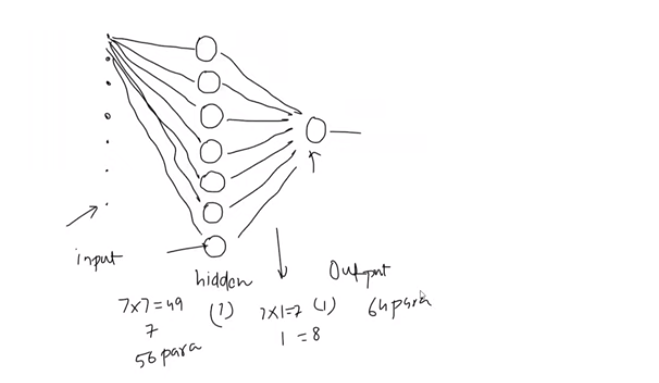

<br> 

---

In [48]:

model = tf.keras.Sequential()

activation_relu = tf.keras.activations.relu
activation_liner = tf.keras.activations.linear

# first hidden layer
model.add(tf.keras.layers.Dense(7,activation=activation_relu,input_dim=7))
model.add(tf.keras.layers.Dense(7,activation=activation_relu))

# output  
# linear because we are working with regression problem

model.add(tf.keras.layers.Dense(1,activation='linear'))


/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:

# see the summary of our model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:

# compile the model:
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])



In [51]:
help(tf.keras.callbacks.EarlyStopping())

Help on EarlyStopping in module keras.src.callbacks.early_stopping object:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |
 |  Stop training when a monitored metric has stopped improving.
 |
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |
 |  Args:
 |      monitor: Quantity to be monitored. Defaults to `"va

In [52]:

callback = tf.keras.callbacks.EarlyStopping(
    verbose = 1,
    mode = "auto",
    monitor = "val_loss",
    patience = 10,
    min_delta = 0.000001,
)


In [58]:

# train the model

history = model.fit(X_train_sc,y_train,epochs=1000,validation_split=0.2,callbacks=callback)


Epoch 1/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0119

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.0000e+00 - loss: 0.0169 - val_accuracy: 0.0000e+00 - val_loss: 0.0337
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.0000e+00 - loss: 0.0186 - val_accuracy: 0.0000e+00 - val_loss: 0.0335
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.0000e+00 - loss: 0.0188 - val_accuracy: 0.0000e+00 - val_loss: 0.0333
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0202 - val_accuracy: 0.0000e+00 - val_loss: 0.0331
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0199 - val_accuracy: 0.0000e+00 - val_loss: 0.0329
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0000e+00 - loss: 0.0165 - val_accuracy: 0.0000e+00 - val_loss: 0.0326
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0185 - val_accuracy: 0.0000e+00 - val_loss: 0.0323
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.

<br>
<br>

In [54]:

y_pred = model.predict(X_test_sc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


<br>

`Regression problem  এর ক্ষেত্রে আমরা r2_score  ব্যবহার করি । `                              
<br>                        


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) * 100

-6.221574135455632

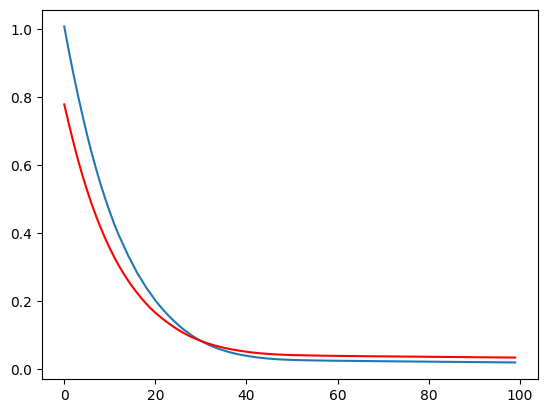

In [56]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],c="r")


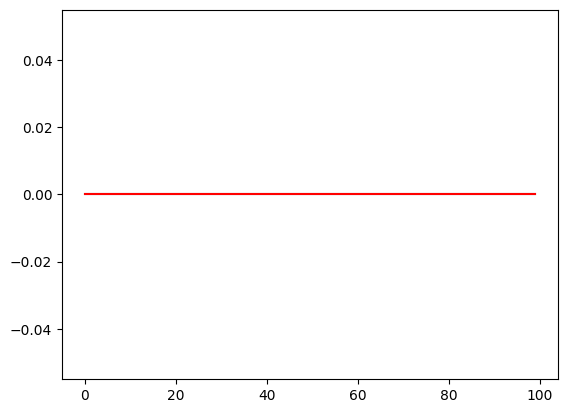

In [57]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],c="r")
